In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving imdb.csv to imdb.csv


In [2]:
basic_data=pd.read_csv('imdb.csv', index_col="tid", error_bad_lines=False)
basic_data.head(5)

b'Skipping line 66: expected 44 fields, saw 46\nSkipping line 111: expected 44 fields, saw 45\nSkipping line 198: expected 44 fields, saw 45\nSkipping line 222: expected 44 fields, saw 46\nSkipping line 278: expected 44 fields, saw 45\nSkipping line 396: expected 44 fields, saw 45\nSkipping line 403: expected 44 fields, saw 45\nSkipping line 421: expected 44 fields, saw 45\nSkipping line 437: expected 44 fields, saw 45\nSkipping line 462: expected 44 fields, saw 46\nSkipping line 491: expected 44 fields, saw 45\nSkipping line 515: expected 44 fields, saw 45\nSkipping line 529: expected 44 fields, saw 45\nSkipping line 530: expected 44 fields, saw 45\nSkipping line 558: expected 44 fields, saw 45\nSkipping line 623: expected 44 fields, saw 45\nSkipping line 646: expected 44 fields, saw 45\nSkipping line 663: expected 44 fields, saw 46\nSkipping line 713: expected 44 fields, saw 45\nSkipping line 730: expected 44 fields, saw 47\nSkipping line 791: expected 44 fields, saw 45\nSkipping lin

,fn,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,FilmNoir,GameShow,History,Horror,Music,Musical,Mystery,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
tid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0012349,titles01/tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,1,0,19,96,85,3,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt0015864,titles01/tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,2,1,35,110,122,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt0017136,titles01/tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,3,4,67,428,376,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
tt0017925,titles01/tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,1,1,53,123,219,3,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt0021749,titles01/tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,2,0,38,187,186,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


**Boolean Indexing :**

Filter values based on conditions from set of columns



In [3]:
best_recent_film=basic_data.loc[(basic_data['year']>2000) & (basic_data['type']=='video.movie') & ((basic_data['nrOfWins']>0) | (basic_data['nrOfNominations']>0)),['title','imdbRating']]
best_recent_film.sort_values('imdbRating',ascending=False).head(10)

,title,imdbRating
tid,,
tt0468569,The Dark Knight (2008),9.0
tt0120737,Der Herr der Ringe - Die Gefährten (2001),8.9
tt0167260,Der Herr der Ringe - Die Rückkehr des Königs (...,8.9
tt0167261,Der Herr der Ringe - Die zwei Türme (2002),8.8
tt1375666,Inception (2010),8.8
tt1510985,Never Sleep Again: The Elm Street Legacy (Vide...,8.7
tt0317248,City of God (2002),8.7
tt0405508,Rang De Basanti (2006),8.6
tt1014762,Home (2009),8.6


**Categorical Attribute :**

Distinct set of elements from a column



In [4]:
set(basic_data['type'])

{'game', 'video.episode', 'video.movie', 'video.tv'}

**Apply Function :**

Returns some value after passing each row/column of a data frame



In [5]:
def miss(a):
  return sum(a.isnull())
basic_data.apply(miss,axis=0)

fn                     0
title                  0
wordsInTitle          13
url                    0
imdbRating          1179
ratingCount         1179
duration            1001
year                  27
type                   0
nrOfWins               0
nrOfNominations        0
nrOfPhotos             0
nrOfNewsArticles       0
nrOfUserReviews        0
nrOfGenre              0
Action                 0
Adult                  0
Adventure              0
Animation              0
Biography              0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Family                 0
Fantasy                0
FilmNoir               0
GameShow               0
History                0
Horror                 0
Music                  0
Musical                0
Mystery                0
News                   0
RealityTV              0
Romance                0
SciFi                  0
Short                  0
Sport                  0
TalkShow               0


**Imputation :**

Updating the missing values with some mode values(Mean or Median)






In [6]:
from scipy.stats import mode
mode(basic_data['wordsInTitle'])
basic_data['wordsInTitle'].fillna(mode(basic_data['wordsInTitle']).mode[0], inplace=True)
basic_data.apply(miss, axis=0)

fn                     0
title                  0
wordsInTitle           0
url                    0
imdbRating          1179
ratingCount         1179
duration            1001
year                  27
type                   0
nrOfWins               0
nrOfNominations        0
nrOfPhotos             0
nrOfNewsArticles       0
nrOfUserReviews        0
nrOfGenre              0
Action                 0
Adult                  0
Adventure              0
Animation              0
Biography              0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Family                 0
Fantasy                0
FilmNoir               0
GameShow               0
History                0
Horror                 0
Music                  0
Musical                0
Mystery                0
News                   0
RealityTV              0
Romance                0
SciFi                  0
Short                  0
Sport                  0
TalkShow               0


**Group By :**

Groups the set of similar values based on condition

In [7]:
b=basic_data.groupby('wordsInTitle')
b.filter(lambda x: len(x) >100)

,fn,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,FilmNoir,GameShow,History,Horror,Music,Musical,Mystery,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
tid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0453562,titles02/index.html.2798,42 (2013),the tonight show with jay leno episode tv episode,http://www.imdb.com/title/tt0453562/,7.6,44350.0,7680.0,2013.0,video.movie,3,13,50,20,168,3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
tt1823013,titles02/index.html.5022,The Tonight Show with Jay Leno Episode #19.79 ...,the tonight show with jay leno episode tv episode,http://www.imdb.com/title/tt1823013/,NaN,NaN,3720.0,2011.0,video.episode,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
tt0087803,titles02/index.html.5338,1984 (1984),the tonight show with jay leno episode tv episode,http://www.imdb.com/title/tt0087803/,7.2,38051.0,6780.0,1984.0,video.movie,5,1,21,85,154,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
tt1834158,titles02/index.html.6013,The Tonight Show with Jay Leno Episode #19.89 ...,the tonight show with jay leno episode tv episode,http://www.imdb.com/title/tt1834158/,NaN,NaN,3720.0,2011.0,video.episode,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
tt1624012,titles02/index.html.6156,The Tonight Show with Jay Leno Episode #18.17 ...,the tonight show with jay leno episode tv episode,http://www.imdb.com/title/tt1624012/,NaN,NaN,3720.0,2010.0,video.episode,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
tt1817038,titles02/index.html.6690,The Tonight Show with Jay Leno Episode #19.75 ...,the tonight show with jay leno episode tv episode,http://www.imdb.com/title/tt1817038/,NaN,NaN,3720.0,2011.0,video.episode,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
tt3157088,titles02/index.html.6718,The Tonight Show with Jay Leno Episode #21.212...,the tonight show with jay leno episode tv episode,http://www.imdb.com/title/tt3157088/,NaN,NaN,3720.0,2013.0,video.episode,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
tt3363044,titles02/index.html.6916,The Tonight Show with Jay Leno Episode #22.51 ...,the tonight show with jay leno episode tv episode,http://www.imdb.com/title/tt3363044/,NaN,NaN,3720.0,2013.0,video.episode,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
tt2984270,titles02/index.html.6974,The Tonight Show with Jay Leno Episode #21.170...,the tonight show with jay leno episode tv episode,http://www.imdb.com/title/tt2984270/,NaN,NaN,3720.0,2013.0,video.episode,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


**Pivot Table : **

Grouping and imputing up the metrics

In [8]:
import numpy as np
group_rating=basic_data.pivot_table(values='imdbRating', index=['type'],aggfunc=np.mean)
group_rating

,imdbRating
type,
game,7.746018
video.episode,7.592864
video.movie,6.720442
video.tv,7.294851


**Cross Tab :**

Provide some basic hypothesis among data

In [9]:
pd.crosstab(basic_data['Comedy'], basic_data['Crime'], margins=True)

Crime,0,1,All
Comedy,,,
0,7728,1440,9168
1,4626,538,5164
All,12354,1978,14332


**Plotting :**

Get Visual insight on data

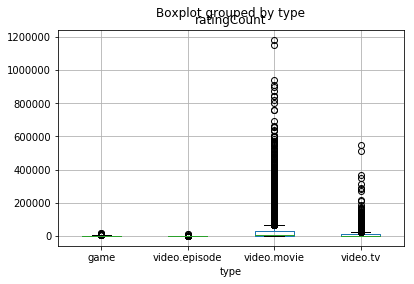

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
basic_data.boxplot(column="ratingCount",by="type")

**Binning :**

Clustering numerical values

In [11]:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning age:
cut_points = [3,5,8]
labels = ["Flop","Average","Hit","Block Buster"]
basic_data["Rating_Bin"] = binning(basic_data["imdbRating"], cut_points, labels)
bin=pd.value_counts(basic_data["Rating_Bin"], sort=False)
bin

Flop              123
Average           708
Hit             10848
Block Buster     1474
Name: Rating_Bin, dtype: int64

**Visualisation :**

Bar chart

<BarContainer object of 4 artists>

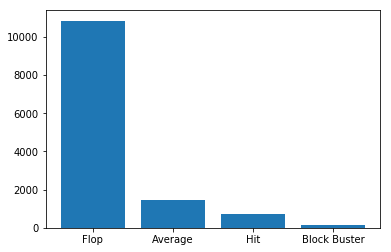

In [12]:
plt.bar(labels,pd.value_counts(basic_data["Rating_Bin"]))

**Visualisation :**

Histogram

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([   9.,   78.,  147.,  288.,  793., 2162., 4308., 4232., 1095.,
          41.]),
 array([1.  , 1.89, 2.78, 3.67, 4.56, 5.45, 6.34, 7.23, 8.12, 9.01, 9.9 ]),
 <a list of 10 Patch objects>)

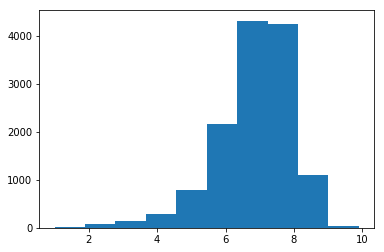

In [13]:
plt.hist(basic_data['imdbRating'],bins=10)

**Visualisation :**

Cumulative histogram

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  773.,  2362.,  3526.,  5889., 10481., 12272., 12829., 13094.,
        13195., 13241., 13268., 13278., 13282., 13288., 13292., 13302.,
        13307., 13310., 13312., 13315., 13316., 13320., 13320., 13320.,
        13322., 13323., 13324., 13324., 13324., 13324., 13325., 13326.,
        13327., 13328., 13328., 13328., 13328., 13328., 13329., 13330.,
        13330., 13330., 13330., 13330., 13330., 13330., 13330., 13330.,
        13330., 13331.]),
 array([2.000000e+00, 1.369960e+03, 2.737920e+03, 4.105880e+03,
        5.473840e+03, 6.841800e+03, 8.209760e+03, 9.577720e+03,
        1.094568e+04, 1.231364e+04, 1.368160e+04, 1.504956e+04,
        1.641752e+04, 1.778548e+04, 1.915344e+04, 2.052140e+04,
        2.188936e+04, 2.325732e+04, 2.462528e+04, 2.599324e+04,
        2.736120e+04, 2.872916e+04, 3.009712e+04, 3.146508e+04,
        3.283304e+04, 3.420100e+04, 3.556896e+04, 3.693692e+04,
        3.830488e+04, 3.967284e+04, 4.104080e+04, 4.240876e+04,
        4.377672e+04, 4.514468

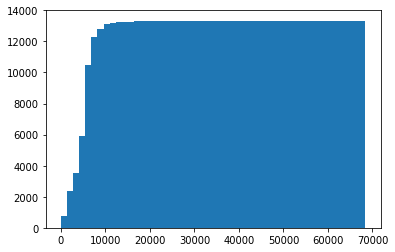

In [14]:
plt.hist(basic_data['duration'],cumulative=True, bins=50)

**Visualisation :**

Stack chart

([<matplotlib.axis.XTick at 0x7f7bbbb31ef0>,
 <a list of 4 Text xticklabel objects>)

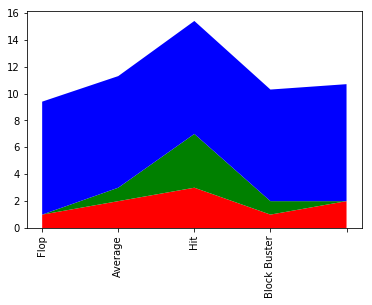

In [16]:
#x=[1,2,3,4,5,6,7,8,9,10]
fig=plt.stackplot(basic_data['title'].head(5),basic_data['nrOfWins'].head(5),basic_data['nrOfNominations'].head(5),basic_data['imdbRating'].head(5),colors=['r','g','b'])
plt.xticks(basic_data['title'].head(5), labels, rotation='vertical')